In [1]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from ast import literal_eval
from statsmodels.nonparametric.smoothers_lowess import lowess
import statsmodels.api as sm

In [488]:
# Convert json structure to csv
df = pd.read_json("polymaths_enriched_updated.json")
df.to_csv("polymaths_enriched.csv", index=False)

In [3]:
# Inspect dataset
df1 = pd.read_csv(r"C:\Users\MSI\Downloads\polymaths_clean.csv")
df1.head()

,qid,birth_year,death_year,place_of_birth,citizenship,gender,name,occupations,polymath_score_mapped,birth_decade
0,Q234224,1932,1985.0,['San Francisco'],United States,['female'],Dian Fossey,"['ecologist', 'primatologist', 'ethologist', '...",3,1930.0
1,Q7286,1706,1749.0,['Paris'],France,['female'],Émilie du Châtelet,"['essayist', 'physicist', 'mathematician', 'ph...",4,1700.0
2,Q1585846,1796,1869.0,['Hanau'],Germany,['male'],Karl Ludwig Blum,"['historian', 'statistician', 'poet', 'geograp...",3,1790.0
3,Q9300159,1851,1928.0,['São Paulo'],Brazil,['male'],Ramos de Azevedo,"['entrepreneur', 'university teacher', 'archit...",3,1850.0
4,Q119149,1840,1907.0,['Munich'],Germany,['male'],Max Haushofer,"['university teacher', 'economist', 'statistic...",6,1840.0


In [781]:
# Dataframe inspection
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2182 entries, 0 to 2181
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   qid                    2182 non-null   object 
 1   birth_year             2182 non-null   int64  
 2   death_year             2180 non-null   float64
 3   place_of_birth         2182 non-null   object 
 4   citizenship            2182 non-null   object 
 5   gender                 2182 non-null   object 
 6   name                   2182 non-null   object 
 7   occupations            2182 non-null   object 
 8   polymath_score_mapped  2182 non-null   int64  
 9   birth_decade           2182 non-null   int64  
 10  occupations_parsed     2182 non-null   object 
dtypes: float64(1), int64(3), object(7)
memory usage: 187.6+ KB


In [785]:
# View top 10 polymaths
df1.sort_values("birth_year", ascending=False).head(10)

,qid,birth_year,death_year,place_of_birth,citizenship,gender,name,occupations,polymath_score_mapped,birth_decade
614,Q1717556,2000,2018.0,[],Germany,['male'],Jürgen Plate,"['university teacher', 'writer', 'computer sci...",3,2000.0
1091,Q19273011,1969,NaN,['Mexico City'],Mexico,['female'],Helga Ochoterena-Booth,"['university teacher', 'taxonomist', 'botanist...",3,1960.0
1696,Q20492133,1963,2013.0,['Barcelona'],Spain,['male'],Albert Jovell,"['sociologist', 'writer', 'physician']",3,1960.0
436,Q4695887,1962,2018.0,['Tanta'],Egypt,['male'],Ahmad Khaled Tawfik,"['short story writer', 'university teacher', '...",4,1960.0
1471,Q7152445,1961,2013.0,['Melbourne'],Australia,['male'],Paul Mees,"['urban planner', 'transport planner', 'univer...",3,1960.0
1007,Q1176599,1961,2011.0,['Neuilly-sur-Seine'],France,['male'],David Servan-Schreiber,"['essayist', 'university teacher', 'journalist...",3,1960.0
552,Q49828,1960,2008.0,['Baltimore'],United States,['male'],Randy Pausch,"['pedagogue', 'motivational speaker', 'univers...",3,1960.0
1320,Q55217502,1959,2012.0,['Stuttgart'],Germany,['male'],Rolf Kohring,"['university teacher', 'paleontologist', 'ento...",3,1950.0
1288,Q12103362,1958,2018.0,['Lviv'],Ukraine,['female'],Eva Hata,"['university teacher', 'mathematician', 'writer']",3,1950.0
1296,Q12133221,1957,2019.0,['Khittsi'],Ukraine,['male'],Oleksiy Nezhyvyj,"['man of letters', 'lecturer', 'university tea...",3,1950.0


In [621]:
# Convert string-lists to actual lists (e.g., "['writer', 'physician']" → ['writer', 'physician'])
df1['occupations_parsed'] = df1['occupations'].apply(
    lambda x: literal_eval(x) if isinstance(x, str) else x
)

# Now count occupations correctly
all_occupations = [
    occupation.strip("'")  # Clean extra quotes if needed
    for sublist in df1['occupations_parsed']
    for occupation in sublist
    if isinstance(sublist, list)  # Skip non-list entries
]

# Get top 10 occupations
top_occupations = Counter(all_occupations).most_common(10)
print(top_occupations)

[('writer', 1729), ('university teacher', 897), ('physician', 697), ('politician', 585), ('philosopher', 424), ('mathematician', 377), ('poet', 350), ('botanist', 313), ('historian', 301), ('engineer', 263)]


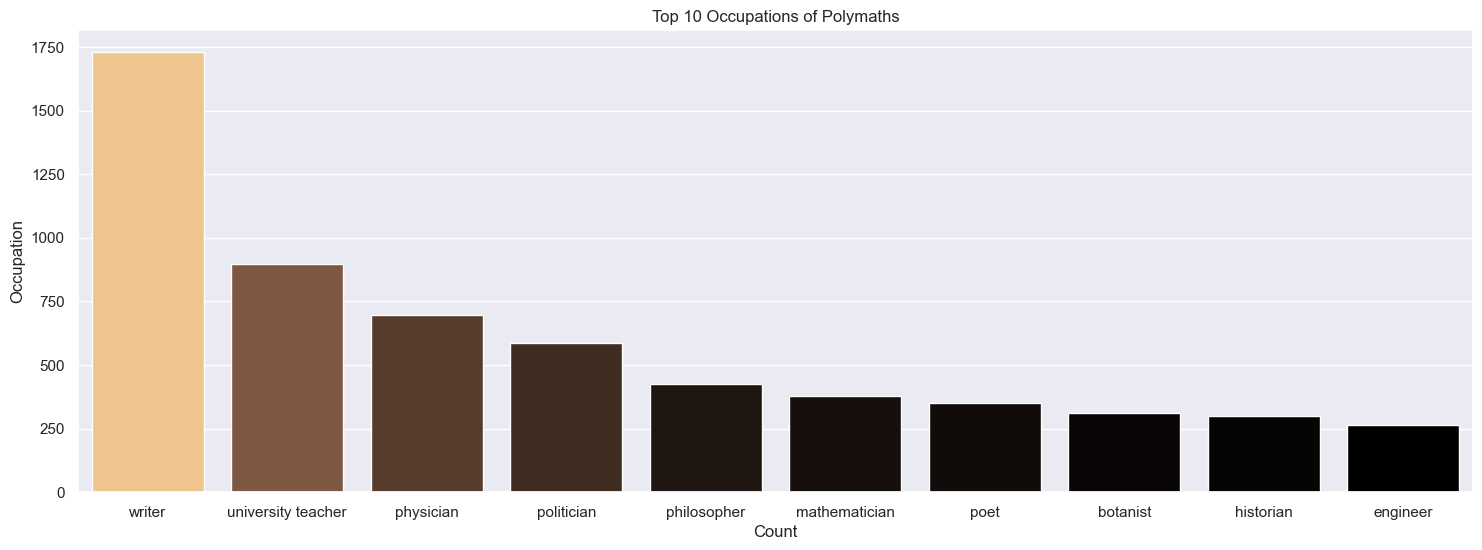

In [635]:
# Unpack the top occupations
occupations, counts = zip(*top_occupations)

# Plot
plt.figure(figsize=(18, 6))
sns.barplot(x=occupations, y=counts, palette="copper", hue=list(counts), legend=False)
plt.title('Top 10 Occupations of Polymaths')
plt.xlabel('Count')
plt.ylabel('Occupation')
plt.show()

In [663]:
# Clean and count citizenships
all_citizenships = []
for row in df1['citizenship']:
    if pd.notna(row) and row != "Unknown":
        for country in row.split('/'):
            all_citizenships.append(country.strip())

# Count frequencies
country_counts = Counter(all_citizenships)
top_countries = country_counts.most_common(15)

top_countries

[('Germany', 368),
 ('United States', 314),
 ('United Kingdom', 224),
 ('France', 200),
 ('Italy', 137),
 ('Spain', 135),
 ('Russia', 109),
 ('Austria', 92),
 ('Czech Republic', 84),
 ('Netherlands', 63),
 ('Poland', 58),
 ('Switzerland', 50),
 ('Sweden', 41),
 ('Turkey', 34),
 ('Hungary', 30)]

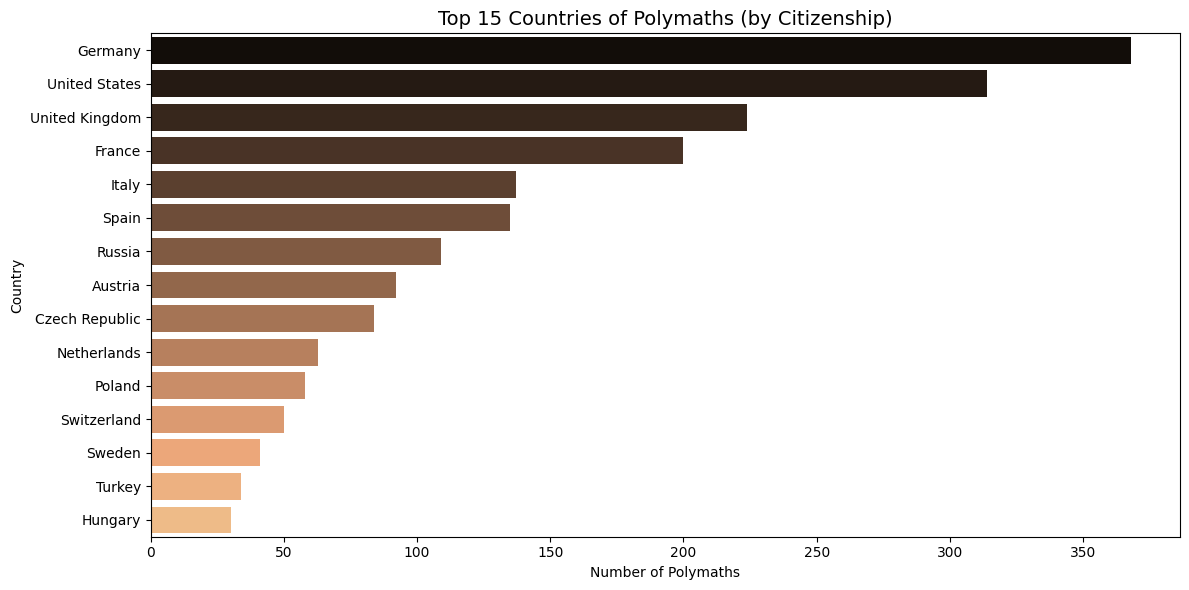

In [7]:
# Clean and count citizenships
all_citizenships = []
for row in df1['citizenship']:
    if pd.notna(row) and row != "Unknown":
        for country in row.split('/'):
            all_citizenships.append(country.strip())

# Count frequencies
country_counts = Counter(all_citizenships)
top_countries2 = country_counts.most_common(15)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(
    x=[count for country, count in top_countries2],
    y=[country for country, count in top_countries2],
    palette="copper",
    hue=[country for country, count in top_countries2],
    legend=False
)
plt.title("Top 15 Countries of Polymaths (by Citizenship)", fontsize=14)
plt.xlabel("Number of Polymaths")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

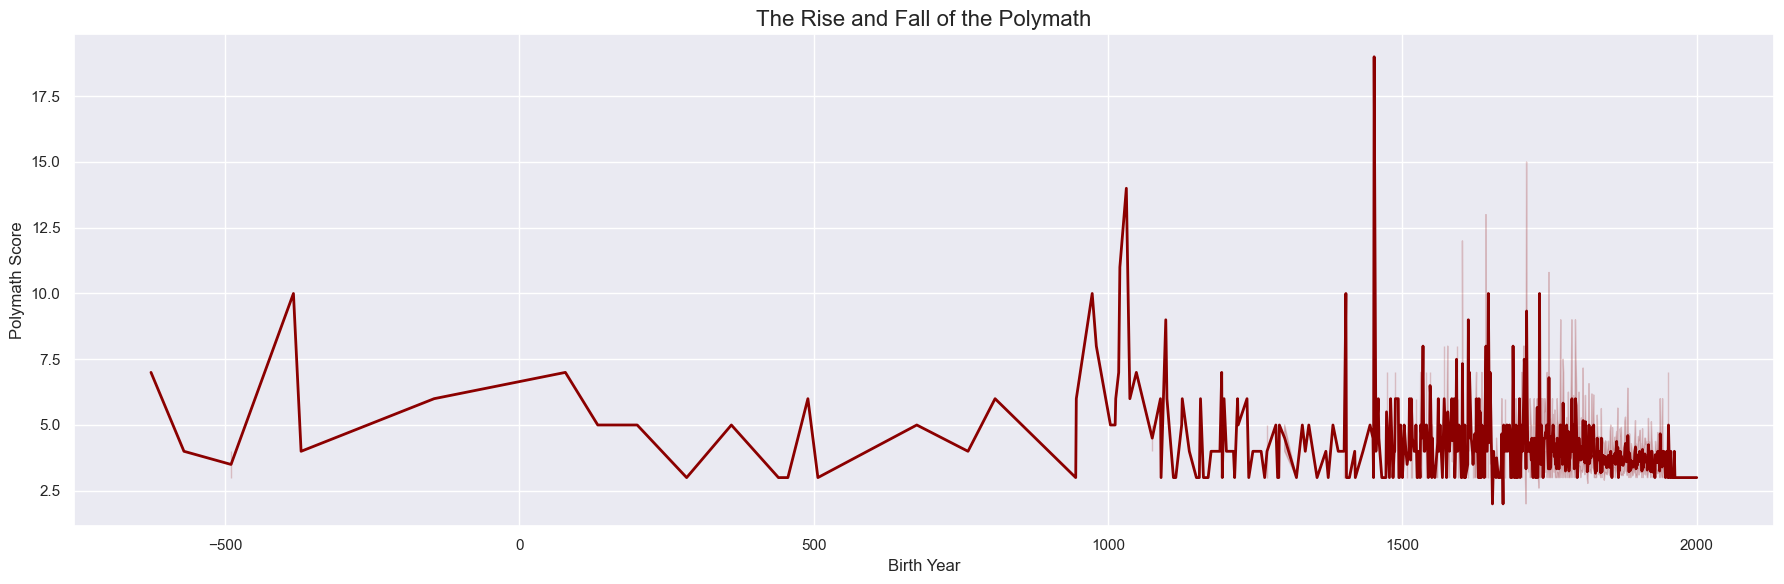

In [641]:
# Time series plot of all polymaths
plt.figure(figsize=(18, 6))
sns.lineplot(data=df1, x='birth_year', y='polymath_score_mapped', color='darkred', linewidth=2)
plt.title("The Rise and Fall of the Polymath", fontsize=16)
plt.xlabel("Birth Year")
plt.ylabel("Polymath Score")
plt.grid(True)
plt.tight_layout()
plt.show()

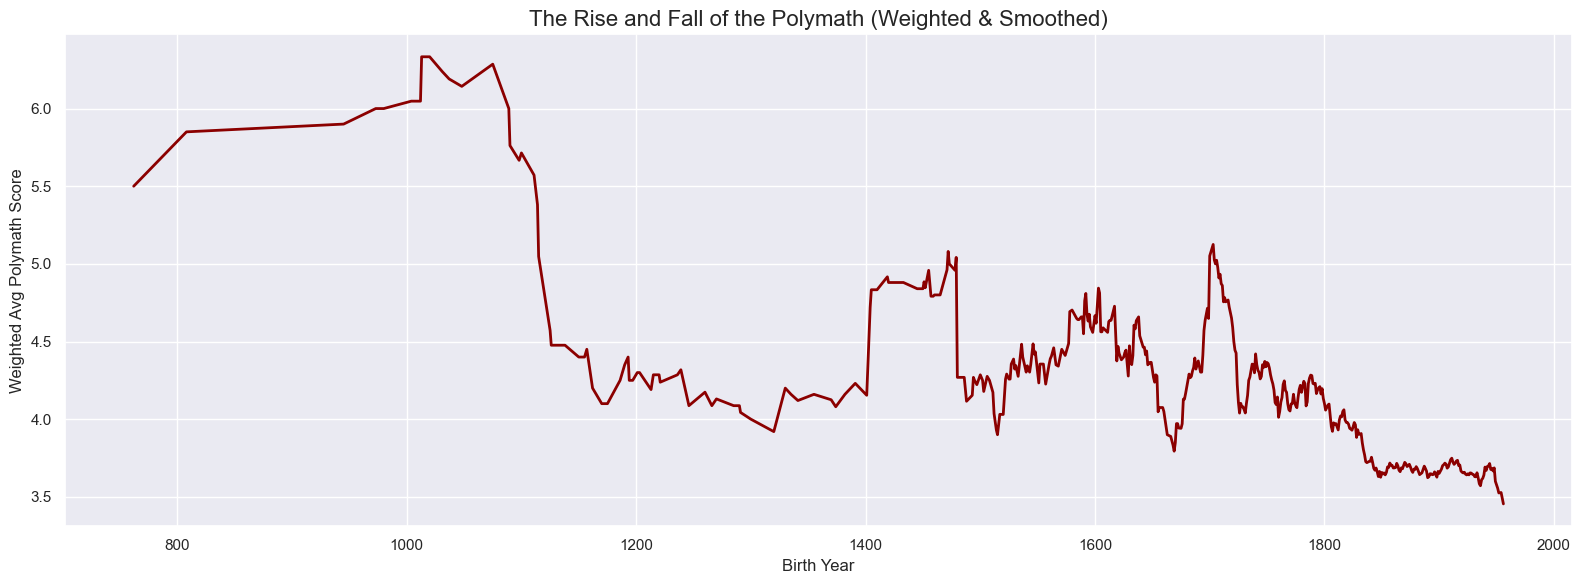

In [657]:
# 1. Count number of polymaths per year
counts = df_cleaned.groupby('birth_year').size().reset_index(name='count')

# 2. Average polymath score per year
means = df_cleaned.groupby('birth_year')['polymath_score_mapped'].mean().reset_index()

# 3. Merge count and mean
df_grouped = pd.merge(means, counts, on='birth_year')

# 4. Weighted rolling average
df_grouped['weighted'] = df_grouped['polymath_score_mapped'] * df_grouped['count']
df_grouped['rolling_weighted_sum'] = df_grouped['weighted'].rolling(window=20, center=True).sum()
df_grouped['rolling_total_count'] = df_grouped['count'].rolling(window=20, center=True).sum()

df_grouped['rolling_avg'] = df_grouped['rolling_weighted_sum'] / df_grouped['rolling_total_count']

# 5. Plot
plt.figure(figsize=(16, 6))
sns.lineplot(data=df_grouped, x='birth_year', y='rolling_avg', color='darkred', linewidth=2)
plt.title("The Rise and Fall of the Polymath (Weighted & Smoothed)", fontsize=16)
plt.xlabel("Birth Year")
plt.ylabel("Weighted Avg Polymath Score")
plt.grid(True)
plt.tight_layout()
plt.show()

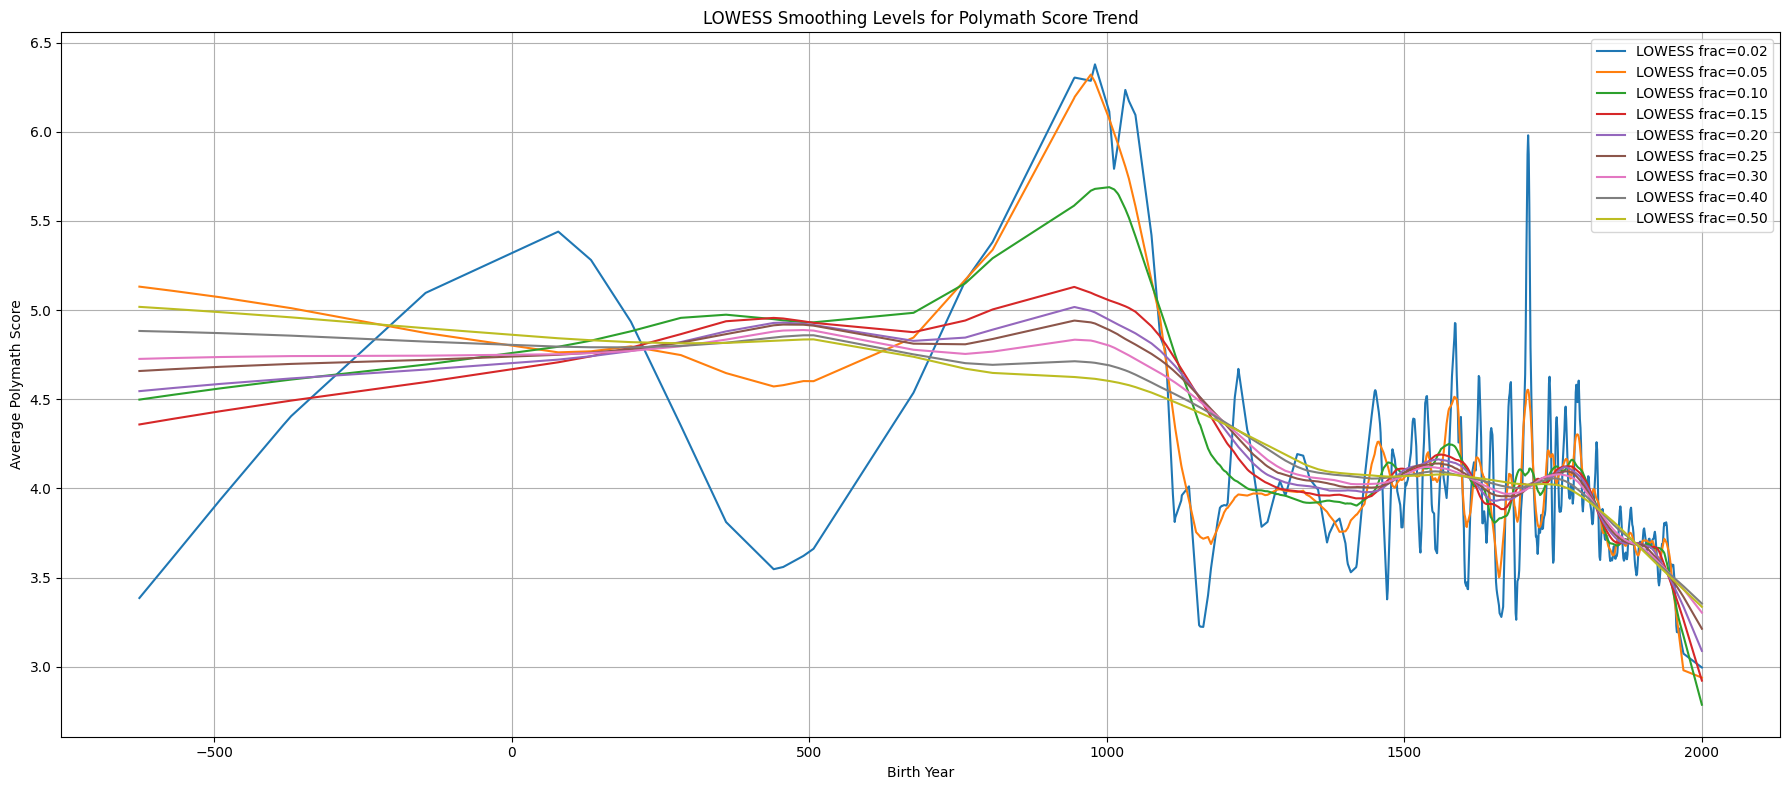

In [729]:
# Test different LOWESS fractions
# Sort data
df_plot = df_grouped.sort_values("birth_year")
x = df_plot["birth_year"]
y = df_plot["avg_score"]

# Range of LOWESS fractions to try
fractions = [0.02, 0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.40, 0.50]

plt.figure(figsize=(18, 8))

for frac in fractions:
    lowess = sm.nonparametric.lowess(y, x, frac=frac, return_sorted=True)
    plt.plot(lowess[:, 0], lowess[:, 1], label=f"LOWESS frac={frac:.2f}")

plt.title("LOWESS Smoothing Levels for Polymath Score Trend")
plt.xlabel("Birth Year")
plt.ylabel("Average Polymath Score")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

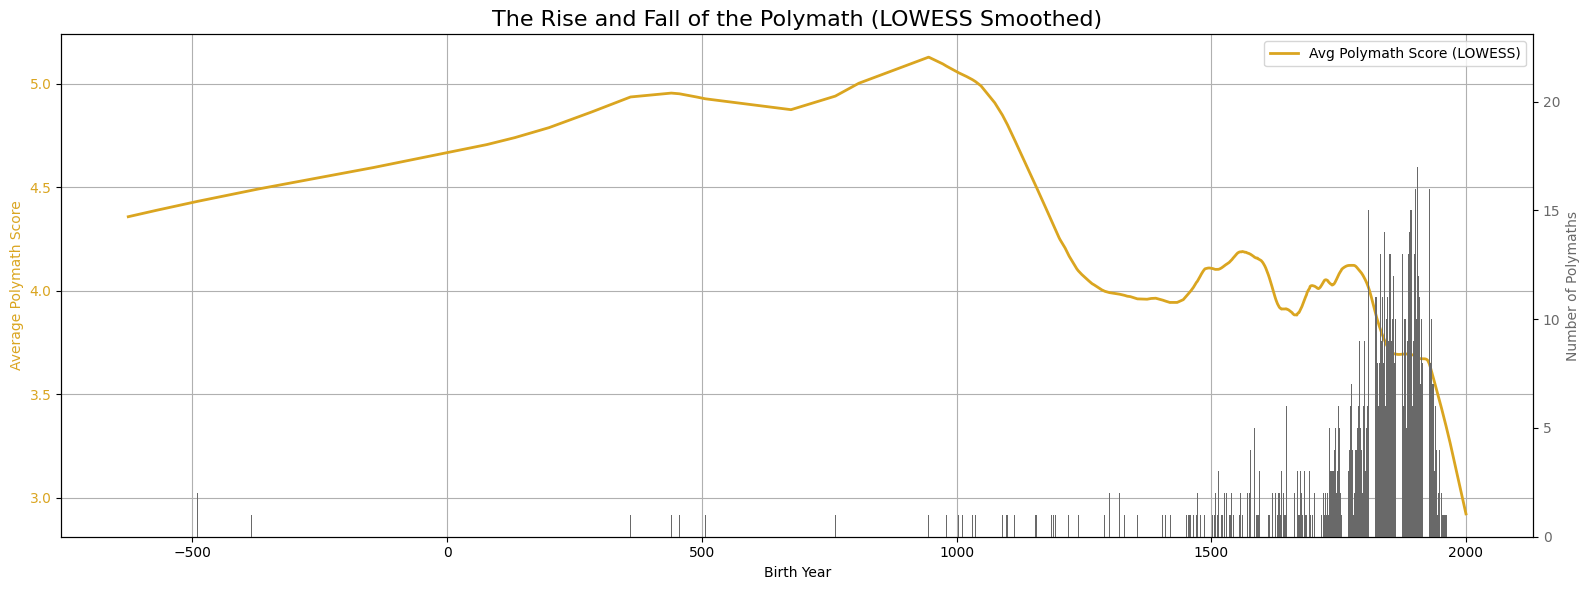

In [777]:
# Group by year
df_grouped = df1.groupby('birth_year').agg({
    'polymath_score_mapped': ['mean', 'count']
}).reset_index()
df_grouped.columns = ['birth_year', 'avg_score', 'count']

# Apply LOWESS smoothing
lowess_smoothed = lowess(
    df_grouped['avg_score'], 
    df_grouped['birth_year'], 
    frac=0.15  # controls smoothness; 0.05 = tighter fit, increase for smoother line
)

# Plotting
fig, ax1 = plt.subplots(figsize=(16, 6))

# Line: LOWESS-smoothed average polymath score
color1 = 'goldenrod'
sns.lineplot(x=lowess_smoothed[:, 0], y=lowess_smoothed[:, 1], ax=ax1, color=color1, linewidth=2, label='Avg Polymath Score (LOWESS)')
ax1.set_ylabel("Average Polymath Score", color=color1)
ax1.tick_params(axis='y', labelcolor=color1)
ax1.set_xlabel("Birth Year")
ax1.set_title("The Rise and Fall of the Polymath (LOWESS Smoothed)", fontsize=16)
ax1.grid(True)

# Bar: Number of polymaths per year
color2 = 'dimgrey'
ax2 = ax1.twinx()
ax2.bar(df_grouped['birth_year'], df_grouped['count'], alpha=1, color=color2, label='Polymaths Born per Year')
ax2.set_ylabel("Number of Polymaths", color=color2)
ax2.tick_params(axis='y', labelcolor=color2)

# Legends and layout
fig.tight_layout()
plt.show()

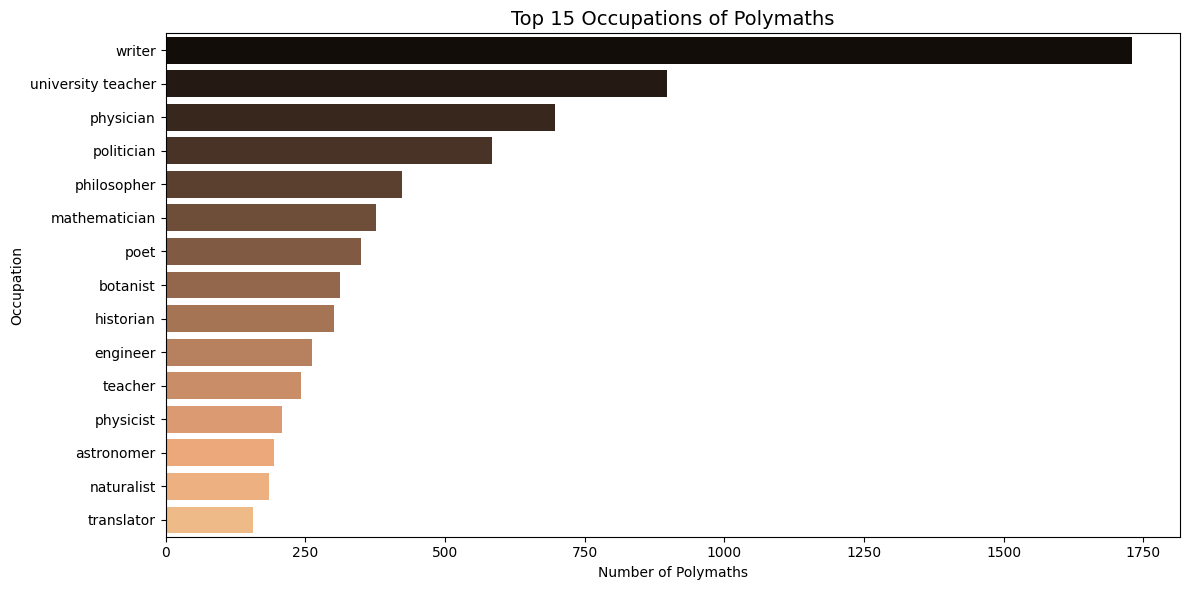

In [9]:
# Clean and count occupations
all_occupations = []
for row in df1['occupations']:
    if pd.notna(row):
        # Remove brackets and quotes, then split by comma
        occupations = row.strip("[]").replace("'", "").split(', ')
        for occupation in occupations:
            all_occupations.append(occupation.strip())

# Count frequencies
occupation_counts = Counter(all_occupations)
top_occupations = occupation_counts.most_common(15)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(
    x=[count for occupation, count in top_occupations],
    y=[occupation for occupation, count in top_occupations],
    palette="copper",
    hue=[occupation for occupation, count in top_occupations],
    legend=False
)
plt.title("Top 15 Occupations of Polymaths", fontsize=14)
plt.xlabel("Number of Polymaths")
plt.ylabel("Occupation")
plt.tight_layout()
plt.show()